Name: 			           Atharva Pravin Navghane

Registration Number: 	 21BCE0083

Email ID: 			       atharvapravin.n2021@vitstudent.ac.in

Campus: 			         VIT Vellore

Branch: 			         Computer Science and Engineering

Phone Number: 		     9168975284


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

Task - 1 : Download the DataSet : penguins_size.csv
---> Task 1 Done. Downloaded the File

In [ ]:
# Task 2 : Load the Data Set
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Task 3: Perform the Below Visualisations

<Axes: >

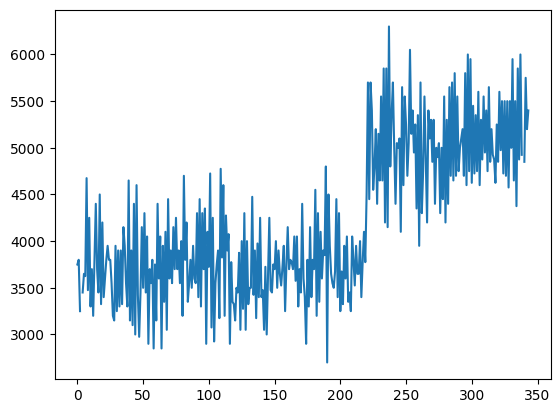

In [ ]:
# a) Univariate Analysis

# --------------> Univariate Analysis of body_mass_g <----------------------
df.body_mass_g.plot()

<Axes: ylabel='Frequency'>

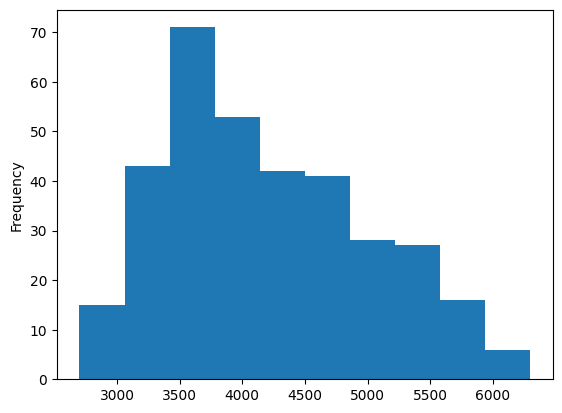

In [ ]:
df.body_mass_g.plot(kind = 'hist')

<Axes: >

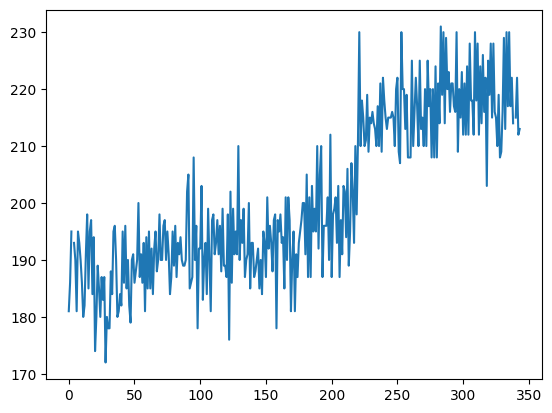

In [ ]:
# -------------> Univariate Analysis of flipper_length_mm <-------------------
df.flipper_length_mm.plot()

<Axes: ylabel='Frequency'>

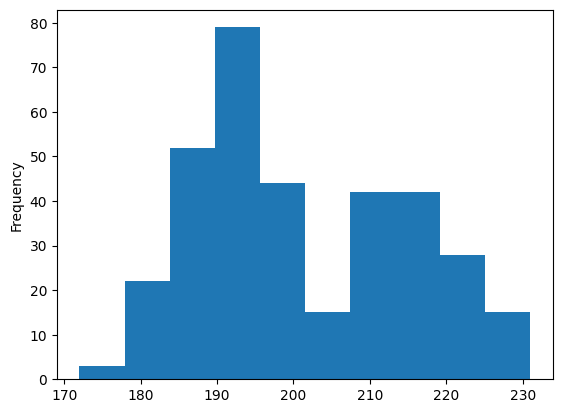

In [ ]:
df.flipper_length_mm.plot(kind = 'hist')

<Axes: >

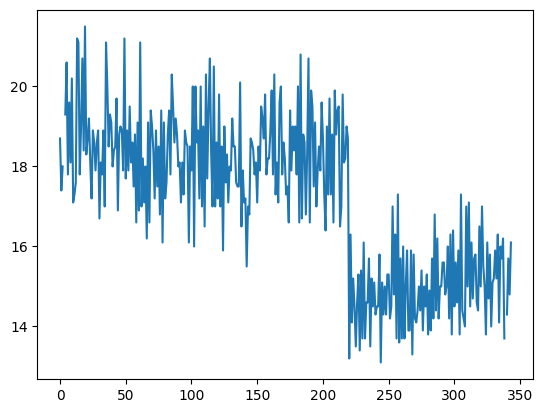

In [ ]:
# -------------> Univariate Analysis of culmen_depth_mm <-------------------
df.culmen_depth_mm.plot()

<Axes: ylabel='Frequency'>

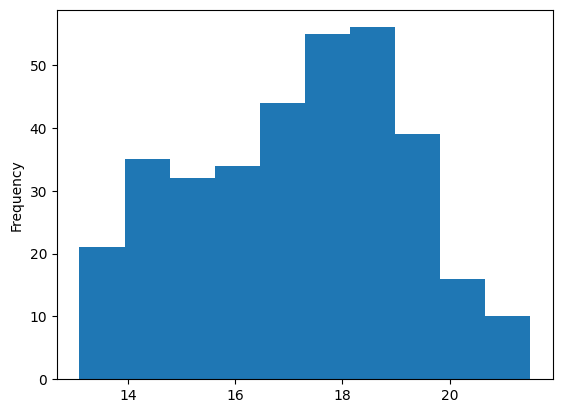

In [ ]:
df.culmen_depth_mm.plot(kind = 'hist')

<Axes: >

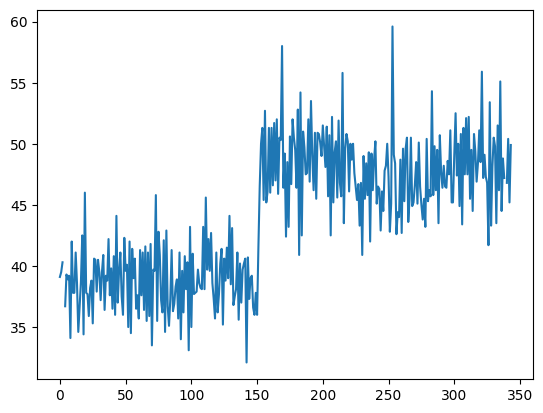

In [ ]:
# -------------> Univariate Analysis of culmen_length_mm <-------------------
df.culmen_length_mm.plot()

<Axes: ylabel='Frequency'>

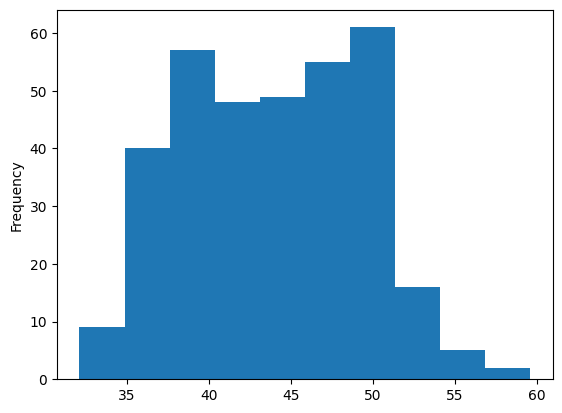

In [ ]:
df.culmen_length_mm.plot(kind = 'hist')

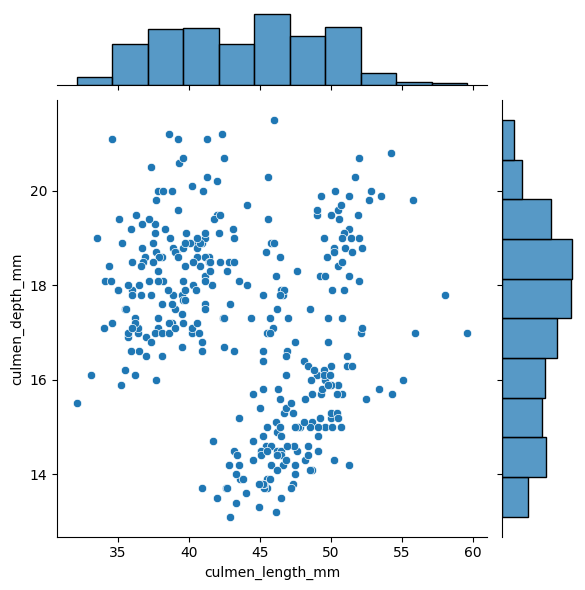

In [ ]:
# b) Bi-Variate Analysis

# --> Bivariate Analysis of culmen_length_mm and culmen_depth_mm <-----
sns.jointplot(data=df, x='culmen_length_mm', y='culmen_depth_mm')

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

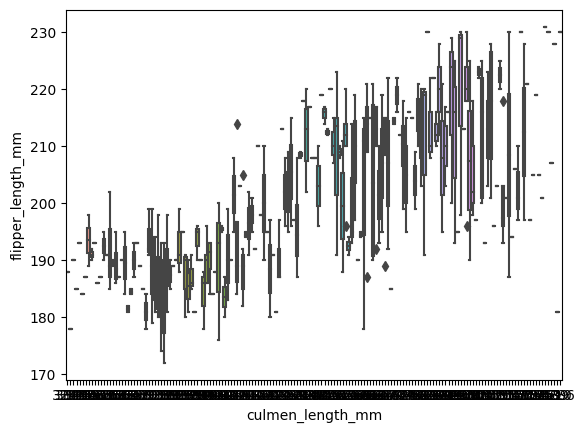

In [ ]:
# --> Bivariate Analysis of culmen_length_mm and flipper_length_mm <-----
sns.boxplot(data=df, x='culmen_length_mm', y='flipper_length_mm')

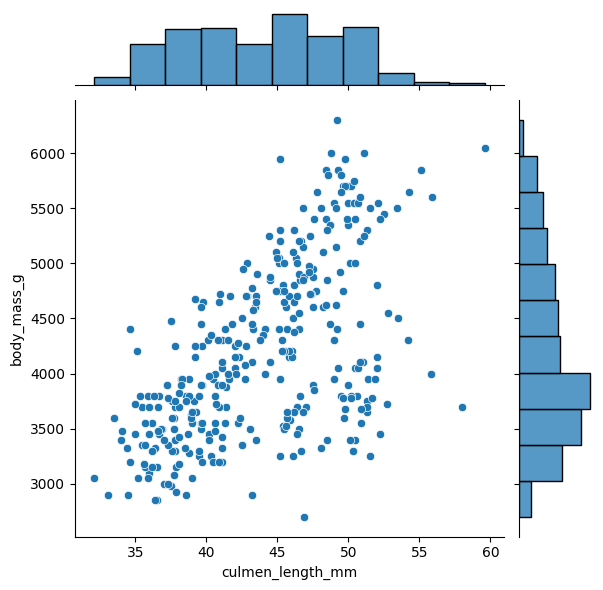

In [ ]:
# --> Bivariate Analysis of culmen_length_mm and body_mass_g <-----
sns.jointplot(data=df, x='culmen_length_mm', y='body_mass_g')

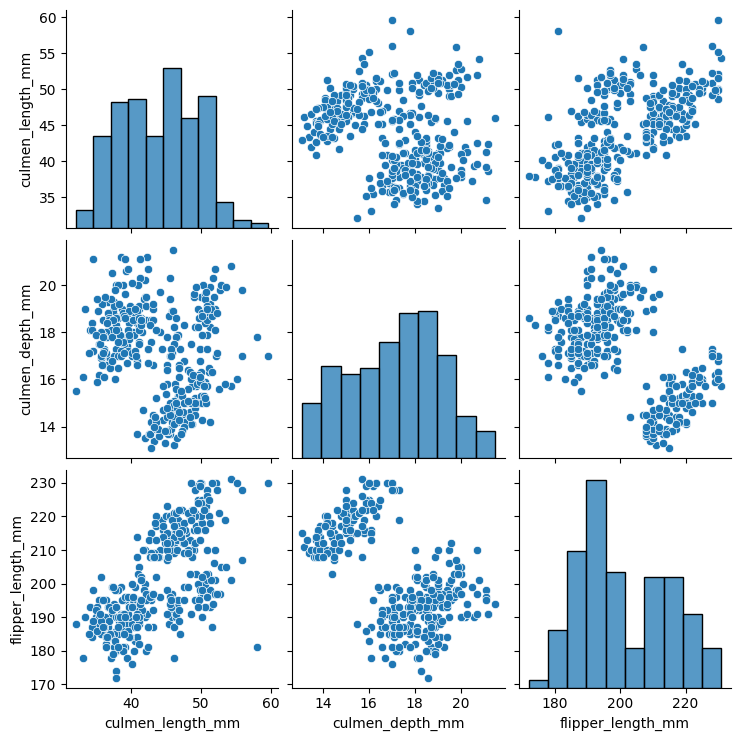

In [ ]:
# c) Multi-Variate Analysis

sns.pairplot(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']])

<ipython-input-16-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

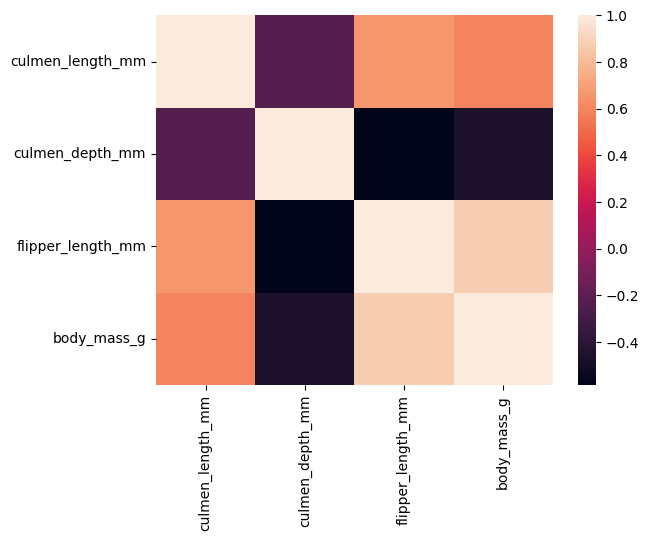

In [ ]:
sns.heatmap(df.corr())

Task 4: Perform descriptive statistics on the dataset.

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Task 5: Handle the missing values

In [ ]:
#We handle the missing values by inserting the mean value of the respective columns in that missing vlaues

#Step 1: Identify which columns have missing values and how many in each column:
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [ ]:
# Step 2: Replace missing values with the mode
for column in df.columns:
    mode = df[column].mode()[0]  # Get the mode (most frequent value) of the column
    df[column].fillna(mode, inplace=True)

In [ ]:
# Verify that missing values have been replaced
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


As we can see , All the Missing Values have been replaced with their mode values.

Task 6 : Find the outliers and replace them outliers

In [ ]:
print("Old Shape: ", df.shape)

# IQR
# Calculate the upper and lower limits

Q1 = df['culmen_length_mm'].quantile(0.25)
Q3 = df['culmen_length_mm'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['culmen_length_mm']>=upper)[0]
lower_array = np.where(df['culmen_length_mm']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


Old Shape:  (344, 7)
New Shape:  (344, 7)


As we can see that there are no outliers in the dataset and hence there is no requirement of their replacement.

Task 7 : Check the correlation of independent variables with the target

<ipython-input-81-23d26f671fce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


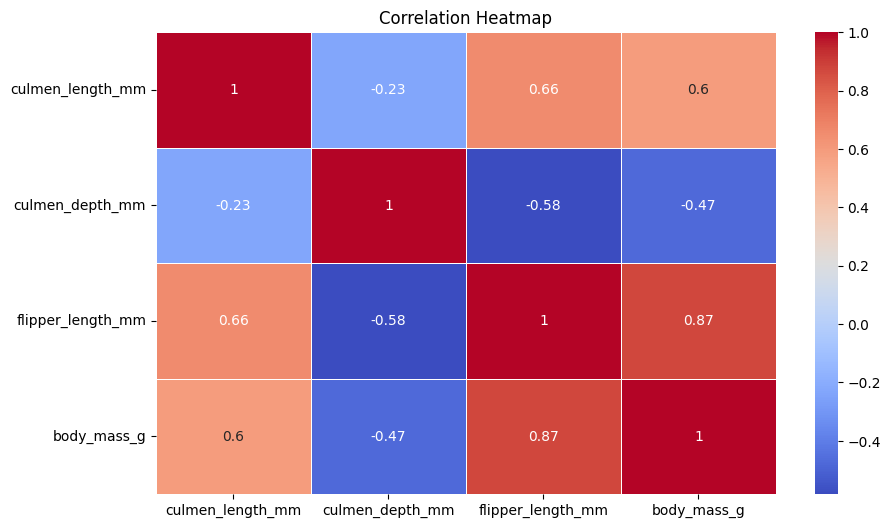

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Examine the correlation of independent variables with the target 'culmen_length_mm'
correlation_with_target = correlation_matrix['culmen_length_mm']
print(f'Correlation of independent variables with the target "culmen_length_mm":\n{correlation_with_target}')

Correlation of independent variables with the target "culmen_length_mm":
culmen_length_mm     1.000000
culmen_depth_mm     -0.234635
flipper_length_mm    0.656856
body_mass_g          0.595720
Name: culmen_length_mm, dtype: float64


Task 8 : Check for Categorical columns and perform encoding.

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
#Step 1: Identify Categorical Columns:

# We can clearly see "Species", "Island," and "Sex" columns are categorical
#Let's encode them.

#Step 2:
# One-Hot Encoding for 'Species' and 'Island'
df = pd.get_dummies(df, columns = ['species', 'island'])

# Label Encoding for 'Sex'
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df.sex = le.fit_transform(df.sex)

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,1,0,0,0,0,1
3,41.1,17.0,190.0,3800.0,2,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,1,0,0,0,0,1


Task 9 : Split the data into dependent and independent variables.


In [ ]:
# Split the data into dependent and independent variables
X = df.drop("species_Adelie", axis=1)  # Independent variables (features)
y = df["species_Adelie"]  # Dependent variable (target)

# Check the shape of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (344, 10)
Shape of y (target): (344,)


Task 10 :  Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the numerical columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


Task 11 : Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Task 12 : check the training and testing data shape

In [ ]:
# Check the shapes of training and testing data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (275, 10)
Shape of X_test: (69, 10)
Shape of y_train: (275,)
Shape of y_test: (69,)


# Thank You 🙂
